In [1]:
import pandas as pd
import numpy as np

import cv2
import numpy
import glob
import pylab as plt
import multiprocessing
from joblib import Parallel, delayed
from tqdm import tqdm


import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
image_lables_positions = pd.read_csv("final_data_backup_v1.csv")

In [3]:
image_lables_positions.shape

(37650, 16)

In [4]:
image_lables_positions.head(3)

,filename,x_min,y_min,x_max,y_max,product_type,fabric_print_type,Blouses,Dresses,Skirts,camouflage,check,floral print,leopard print,polka dot,stripe
0,2c6038d030f7e52a5798e6e5734c8ded-1,357.0,141.0,734.0,753.0,Dresses,camouflage,0,1,0,1,0,0,0,0,0
1,89583cfdcde796b219f8655388777bbb-3,68.0,297.0,1037.0,1077.0,Dresses,camouflage,0,1,0,1,0,0,0,0,0
2,2e74a5870a81c24aa7fb5c86a228cf17-1,194.0,94.0,420.0,312.0,Blouses,check,1,0,0,0,1,0,0,0,0


In [5]:
image_lables_positions['product_type'].value_counts()

Dresses    14650
Skirts     12170
Blouses    10830
Name: product_type, dtype: int64

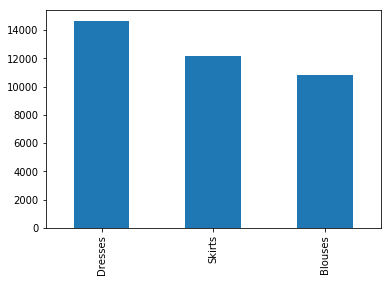

In [6]:
image_lables_positions['product_type'].value_counts().plot(kind='bar')

In [7]:
image_lables_positions['fabric_print_type'].value_counts()

floral print     9429
stripe           8577
polka dot        7348
check            7276
leopard print    4323
camouflage        697
Name: fabric_print_type, dtype: int64

In [8]:
image_lables_positions.groupby(['product_type', 'fabric_print_type']).aggregate({'fabric_print_type' : 'count'})

fabric_print_type
product_type fabric_print_type                   
Blouses      camouflage                        97
             check                           1565
             floral print                    3115
             leopard print                    932
             polka dot                       2628
             stripe                          2493
Dresses      camouflage                       274
             check                           2807
             floral print                    3548
             leopard print                   1935
             polka dot                       2839
             stripe                          3247
Skirts       camouflage                       326
             check                           2904
             floral print                    2766
             leopard print                   1456
             polka dot                       1881
             stripe                          2837

In [9]:
# image_names = list(image_lables_positions["filename"].values+".jpg")
image_names = list(image_lables_positions["filename"].values)

In [10]:
folders = glob.glob('.//Data//ImageClassification//Train//')
imagenames_list = []

for folder in folders:
    for f in glob.glob(folder+'/*.jpg'):
#         if f in image_names:
        imagenames_list.append(f)
len(imagenames_list)

42990

In [11]:
# [img_name for img_name in imagenames_list]

In [12]:
imagenames_list[0:4]

['.//Data//ImageClassification//Train/0720ec9222051f05b4b29fdcf85fef36-navy.jpg',
 './/Data//ImageClassification//Train/1075f79f0dd8649bcc2cec255fcc2ac9-red.jpg',
 './/Data//ImageClassification//Train/20026a4de390e4b9be73ec9c1fe60514-3.jpg',
 './/Data//ImageClassification//Train/c101daf87db84f5ef1e0a048967dc14f-2.jpg']

In [13]:
# def processInput(image):
#     lab = str(image)
#     lab = lab.replace(".//Data//ImageClassification//Train/", "")
#     if lab in image_names:
#         image_1 = cv2.imread(image)
#         b,g,r = cv2.split(image_1)       # get b,g,r
#         rgb_img = cv2.merge([r,g,b]) 
#     #     return [lab, cv2.imread(image, cv2.COLOR_BGR2GRAY)]
#         return [lab, rgb_img]
#     else:
#         ["del", "del"]


# def processInput(image):
#     lab = str(image)
#     lab = lab.replace(".//Data//ImageClassification//Train/", "")
#     if lab in image_names:
#         return [lab, cv2.imread(image, cv2.COLOR_BGR2RGB)]
#     else:
#         ["del", "del"]

def processInput(image):
    lab = str(image)
    lab = lab.replace(".//Data//ImageClassification//Train/", "")
    lab = lab.replace(".jpg", "")
    return [lab, cv2.imread(image, cv2.COLOR_BGR2RGB)]
   
num_cores = multiprocessing.cpu_count() 
num_cores


30

In [14]:
import time
start = time.time()
results = Parallel(n_jobs=num_cores)(delayed(processInput)(image) for image in imagenames_list)
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))


00:07:47.35


In [15]:
results[0][1].shape

(770, 600, 3)

In [16]:
results[0][0]

'0720ec9222051f05b4b29fdcf85fef36-navy'

In [17]:
np.shape(results)

(42990, 2)

In [18]:
import gc
gc.collect()


21324

In [19]:

# import copy 
# temp_results = copy.deepcopy(results)


In [20]:
for i in range(len(results)):
    results[i][0] = str(results[i][0]).replace(".//Data//ImageClassification//Train/", "")


In [21]:
# results[0][0]

In [22]:
temp_results = []
for i in range(len(results)):
    if (results[i][0] in image_names):
        temp_results.append(results[i])

In [23]:
np.shape(temp_results)

(37650, 2)

In [24]:
np.shape(image_names)

(37650,)

In [25]:
# del results

In [26]:
image_lables_positions.head(2)

,filename,x_min,y_min,x_max,y_max,product_type,fabric_print_type,Blouses,Dresses,Skirts,camouflage,check,floral print,leopard print,polka dot,stripe
0,2c6038d030f7e52a5798e6e5734c8ded-1,357.0,141.0,734.0,753.0,Dresses,camouflage,0,1,0,1,0,0,0,0,0
1,89583cfdcde796b219f8655388777bbb-3,68.0,297.0,1037.0,1077.0,Dresses,camouflage,0,1,0,1,0,0,0,0,0


In [27]:
# temp_results[1]

In [28]:
# for i in range(len(bounderies_images)):
cropped_images_labeled = []
for i in range(len(temp_results)):
    temp = image_lables_positions[image_lables_positions['filename'] == temp_results[i][0]]
    
    y_min = temp['y_min'].values
    y_max = temp['y_max'].values
    
    x_min = temp['x_min'].values
    x_max = temp['x_max'].values
    
    product_type = temp['product_type'].values
    fabric_print_type = temp['fabric_print_type'].values
    
    Blouses = temp['Blouses'].values
    Dresses = temp['Dresses'].values
    Skirts = temp['Skirts'].values
    camouflage = temp['camouflage'].values
    check = temp['check'].values
    floral_print = temp['floral print'].values
    leopard_print = temp['leopard print'].values
    polka_dot = temp['polka dot'].values
    stripe = temp['stripe'].values
    
    temp_label = temp_results[i][0]
    if ((y_min == 0.0)  & (x_min == 0.0)):
        temp_crop_img = temp_results[i][1]
    else:
        temp_crop_img = temp_results[i][1][int(y_min) : int(y_max), int(x_min) : int(x_max)]
    
    cropped_images_labeled.append([temp_label, temp_crop_img, product_type, fabric_print_type, \
                                  Blouses, Dresses, Skirts, camouflage, check, floral_print, leopard_print,\
                                  polka_dot, stripe])
    

In [29]:
print (np.shape(cropped_images_labeled))
print (np.shape(cropped_images_labeled[0]))
print (np.shape(image_lables_positions))
print (np.shape(temp_results))


(37650, 13)
(13,)
(37650, 16)
(37650, 2)


In [30]:
# temp_results[1][1]

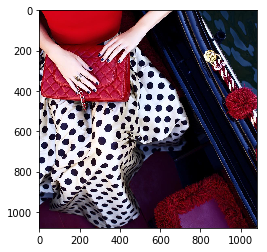

In [31]:
# cv2.imshow("cropped", cropped_images_labeled[1][1])
# cv2.waitKey(0)


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import matplotlib.pyplot as plt
# load image using cv2....and do processing.
plt.imshow(cv2.cvtColor(temp_results[100][1], cv2.COLOR_BGR2RGB))

plt.show()



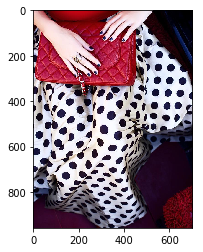

In [32]:
# cv2.imshow("cropped", cropped_images_labeled[1][1])
# cv2.waitKey(0)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

plt.imshow(cv2.cvtColor(cropped_images_labeled[100][1], cv2.COLOR_BGR2RGB))
plt.show()

<Figure size 432x288 with 0 Axes>

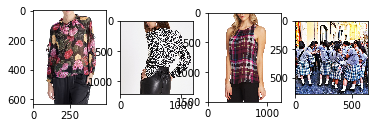

In [33]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,4) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(cv2.cvtColor(temp_results[101][1], cv2.COLOR_BGR2RGB))
axarr[1].imshow(cv2.cvtColor(temp_results[102][1], cv2.COLOR_BGR2RGB))
axarr[2].imshow(cv2.cvtColor(temp_results[103][1], cv2.COLOR_BGR2RGB))
axarr[3].imshow(cv2.cvtColor(temp_results[104][1], cv2.COLOR_BGR2RGB))

<Figure size 432x288 with 0 Axes>

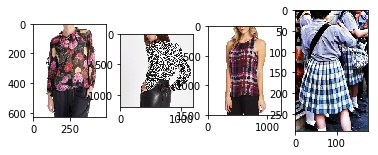

In [34]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,4) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(cv2.cvtColor(cropped_images_labeled[101][1], cv2.COLOR_BGR2RGB))
axarr[1].imshow(cv2.cvtColor(cropped_images_labeled[102][1], cv2.COLOR_BGR2RGB))
axarr[2].imshow(cv2.cvtColor(cropped_images_labeled[103][1], cv2.COLOR_BGR2RGB))
axarr[3].imshow(cv2.cvtColor(cropped_images_labeled[104][1], cv2.COLOR_BGR2RGB))

In [35]:
width = []
height = []

for i in range(len(cropped_images_labeled)):
    width.append(np.shape(cropped_images_labeled[i][1])[0])
    height.append(np.shape(cropped_images_labeled[i][1])[1])
    if (np.shape(cropped_images_labeled[i][1])[0]==0):
        print (cropped_images_labeled[i][0])
        print (i)
        break

In [36]:
np.shape(cropped_images_labeled[0][1])[0]

770

In [37]:
cropped_images_labeled[0][0]

'0720ec9222051f05b4b29fdcf85fef36-navy'

In [38]:
print (np.min(height))
print (np.max(height))

40
4480


In [39]:
print (np.min(width))
print (np.max(width))

45
5723


In [ ]:
import seaborn as sns

plt.figure(figsize=(18,5))
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='large')


sns.countplot(height)
plt.xlabel("Product and fabric print type", fontweight='light', fontsize='x-large')
plt.ylabel("Count", fontweight='light', fontsize='x-large')

Text(0, 0.5, 'Count')

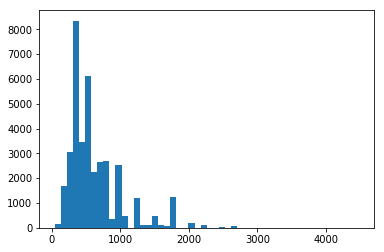

In [40]:
plt.hist(height, bins=50) 
plt.show()

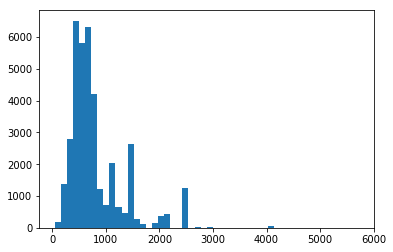

In [41]:
plt.hist(width, bins=50)
plt.show()


In [42]:
width_fixed = 250
height_fixed = 250

In [43]:
# low dimention images 

low_dimension_images = []
high_dimension_images = []

for i in range(len(cropped_images_labeled)):
    if (np.shape(cropped_images_labeled[i][1])[0] < width_fixed) | (np.shape(cropped_images_labeled[i][1])[1] < height_fixed):
        low_dimension_images.append(cropped_images_labeled[i])
    else:
        high_dimension_images.append(cropped_images_labeled[i])

print (np.shape(low_dimension_images))

print (np.shape(high_dimension_images))

print (np.shape(low_dimension_images)[0] + np.shape(high_dimension_images)[0])

print (np.shape(cropped_images_labeled))



(3161, 13)
(34489, 13)
37650
(37650, 13)


In [44]:

# import copy 
# low_dimension_images_copy = copy.deepcopy(low_dimension_images)
# high_dimension_images_copy = copy.deepcopy(high_dimension_images)


In [45]:
import time
start = time.time()

for i in range(len(low_dimension_images)):
    low_dimension_images[i][1] = cv2.resize(low_dimension_images[i][1],(width_fixed,height_fixed), \
                                            interpolation = cv2.INTER_AREA)
    low_dimension_images[i][1] = cv2.bilateralFilter(low_dimension_images[i][1],11, 21, 7)
    
for i in range(len(high_dimension_images)):
    high_dimension_images[i][1] = cv2.resize(high_dimension_images[i][1],(width_fixed,height_fixed), \
                                            interpolation = cv2.INTER_CUBIC)
    high_dimension_images[i][1] = cv2.bilateralFilter(high_dimension_images[i][1],11, 21, 7)

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))


00:11:18.45


In [46]:

print (np.shape(low_dimension_images))
print (np.shape(high_dimension_images))

print (np.shape(cropped_images_labeled))

(3161, 13)
(34489, 13)
(37650, 13)


In [47]:
for i in range(len(low_dimension_images)):
    cv2.imwrite('.//Data//Training_images_after_crop//'+ low_dimension_images[i][0]+".jpg", low_dimension_images[i][1])


In [48]:
for i in range(len(high_dimension_images)):
    cv2.imwrite('.//Data//Training_images_after_crop//'+ high_dimension_images[i][0]+".jpg", high_dimension_images[i][1])
    

In [49]:
df_low_dimension_images = pd.DataFrame(low_dimension_images) 
df_high_dimension_images = pd.DataFrame(high_dimension_images) 

In [50]:
df_low_dimension_images.columns = ['temp_label', 'temp_crop_img', 'product_type', 'fabric_print_type', \
                                  'Blouses', 'Dresses', 'Skirts', 'camouflage', 'check', 'floral_print', 'leopard_print',\
                                  'polka_dot', 'stripe']

In [51]:
df_high_dimension_images.columns = ['temp_label', 'temp_crop_img', 'product_type', 'fabric_print_type', \
                                  'Blouses', 'Dresses', 'Skirts', 'camouflage', 'check', 'floral_print', 'leopard_print',\
                                  'polka_dot', 'stripe']

In [52]:
df_low_dimension_images.shape

(3161, 13)

In [53]:
df_high_dimension_images.shape

(34489, 13)

In [54]:
df_low_dimension_images.to_csv("df_low_dimension_images.csv", index = False)

In [55]:
df_high_dimension_images.to_csv("df_high_dimension_images.csv", index = False)

In [56]:
df_high_dimension_images.head(1)

,temp_label,temp_crop_img,product_type,fabric_print_type,Blouses,Dresses,Skirts,camouflage,check,floral_print,leopard_print,polka_dot,stripe
0,0720ec9222051f05b4b29fdcf85fef36-navy,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",[Dresses],[floral print],[0],[1],[0],[0],[0],[1],[0],[0],[0]
